In [3]:
import librosa

In [2]:
file_path = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav'

In [5]:
audio, sr = librosa.load(file_path)

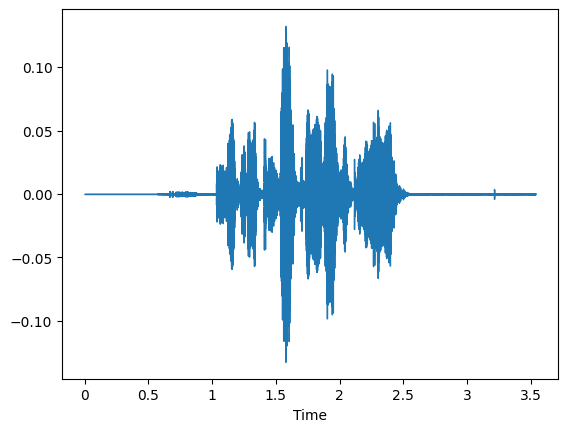

In [9]:
librosa.display.waveshow(y=audio, sr=sr)

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Загрузка аудиофайла
y, sr = librosa.load(file_path, sr=None)  # sr=None сохраняет оригинальную частоту дискретизации

# Применение STFT (короткое преобразование Фурье)
D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512))  # Спектрограмма амплитуд

# Усредняем амплитуды по времени для создания вектора признаков
features = np.mean(D, axis=1)

# Генерируем случайные метки (замени на реальные данные, если есть)
labels = np.random.randint(0, 2, size=(1,))

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    [features], labels, test_size=0.2, random_state=42
)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение логистической регрессии
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Визуализация спектрограммы
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()
